## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [ ]:
taxi_data = pd.read_csv("Project5_train_data.zip")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 


Переведем признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда

In [ ]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')


Посмотрим на пропуски. 


In [ ]:
taxi_data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


Посмотрим на статистические характеристики некоторых признаков. 

У нас присутствует в данных 2 таксопарка

- имеется перевозка с 9 пассажирами

- средняя длительность поездки равна 960 секунд

- минимальное и максимальное время поездки 1 секунда и более суток


In [ ]:
taxi_data.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 



Реализуем функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

In [ ]:
def add_datetime_features(df:pd.DataFrame):
  """Функция добавляет к существующему датафрейму 3 признака: pickup_date, pickup_date, pickup_day_of_week

  Args:
      df (pd.DataFrame): набор данных с информацией о поезках

  Returns:
      pd.DataFrame: датафрейм с новыми колонками
  """
  df['pickup_date'] = df['pickup_datetime'].dt.date
  df['pickup_date'] = df['pickup_datetime'].dt.hour
  df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()
  return df

taxi_data = add_datetime_features(taxi_data)


Создадим функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [ ]:
holiday_data = pd.read_csv('holiday_data.csv', sep=';')

def add_holiday_features(df:pd.DataFrame,holydays:pd.DataFrame):
  """Функция добавляет к существующему датафрейму информацию о том является ли день поездки праздничным

  Args:
      df (pd.DataFrame): набор данных с информацией о поезках
      holydays (pd.DataFrame): датафрейм с информацией о праздничных днях

  Returns:
      pd.DataFrame: возвращает датафрейм с новым столбцом pickup_holiday
  """
  df['pickup_holiday'] = 0
  for date in pd.to_datetime(holydays['date']):
    df.loc[df['pickup_date'] == date,'pickup_holiday'] = 1
  return df

taxi_data = add_holiday_features(taxi_data,holiday_data)
taxi_data['pickup_holiday'].value_counts()

0    1407522
1      51122
Name: pickup_holiday, dtype: int64

Напишем функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM - информацией о расстоянии между точками начала и окончания поезки;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

In [ ]:
osrm_data = pd.read_csv('osrm_data_train.zip')
osrm_data = osrm_data[['id','total_distance','total_travel_time','number_of_steps']]

In [ ]:
def  add_osrm_features(df:pd.DataFrame,osrm:pd.DataFrame):
  """Функция добавляет к текущей таблице 3 признака с инфомацией о расстоянии и времени между точками начала и окончания поездки

  Args:
      df (pd.DataFrame): набор данных с информацией о поезках
      osrm (pd.DataFrame): _набор данных с информацией о расстоянии и времени между точками начала и окончания поезки
  Returns:
      pd.DataFrame: возвращает обновленную таблицу с данными о поездках с добавленными в нее столбцами: total_distance,
      total_travel_time, number_of_steps.
  """
  return df.merge(osrm,how='left',left_on='id',right_on='id')
  
taxi_data = add_osrm_features(taxi_data,osrm_data)

Если рассматривать Землю как сферу, то, зная широту и долготу начальной и конечной точек маршрута, можно вычислить географическое расстояние между точками на сфере, а также узнать направление движения автомобиля.

get_haversine_distance — функция для вычисления расстояния Хаверсина (в километрах);
get_angle_direction — функция для вычисления угла направления движения (в градусах).

In [ ]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    """ функция для вычисления расстояния Хаверсина (в километрах)

    Args:
        lat1 (float): широта точки начала маршрута
        lng1 (float): долгота точки начала маршрута
        lat2 (float): широта точки окончания маршрута
        lng2 (float): долгота точки окончания маршрута

    Returns:
        float: возвращает кратчайшее расстояние между точками
    """
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    """ функция для вычисления угла направления движения (в градусах)

    Args:
        lat1 (float): широта точки начала маршрута
        lng1 (float): долгота точки начала маршрута
        lat2 (float): широта точки окончания маршрута
        lng2 (float): долгота точки окончания маршрута

    Returns:
        float: возвращает угол направления движения
    """
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha


Напишем функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

In [ ]:
def add_geographical_features(df:pd.DataFrame):
  """Функция добавляет к текущему датафрейму два признака с информацией о расстоянии и направлении движения

  Args:
      df (pd.DataFrame): набор данных с информацией о поезках

  Returns:
      pd.DataFrame: возвращает обновленную таблицу с данными о поездках с добавленными в нее столбцами: 
      haversine_distance, direction
  """
  df['haversine_distance'] = get_haversine_distance(df['pickup_latitude'],
                                                    df['pickup_longitude'],
                                                    df['dropoff_latitude'],
                                                    df['dropoff_longitude'])
  df['direction'] = get_angle_direction(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
  return df
taxi_data = add_geographical_features(taxi_data)

Напишем функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция  возвращает обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

In [ ]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

def add_cluster_features(df:pd.DataFrame,kmeans:cluster.KMeans):
  """ Функция для определения географического кластера, к которому относится поездка

  Args:
      df (pd.DataFrame): набор данных с информацией о поезках
      kmeans (cluster.KMeans): обученный алгоритм кластеризации kmeans, для предсказания района города, в котором осуществляется перевозка

  Returns:
      pd.DataFrame: возвращает обновленную таблицу с данными о поездках с добавленными в нее столбцами: geo_cluster
  """
  df['geo_cluster'] = kmeans.predict(df[['pickup_latitude', 'pickup_longitude','dropoff_latitude', 'dropoff_longitude']].values)
  return df
  
taxi_data = add_cluster_features(taxi_data,kmeans)


Реализуем функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

В результате объединения должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

In [ ]:
weather_data = pd.read_csv('weather_data.zip')

def add_weather_features(df:pd.DataFrame,weather_df:pd.DataFrame):
  """ Функция добавляет информацию о погоде о время поезки

  Args:
      df (pd.DataFrame): набор данных с информацией о поезках
      weather_df (pd.DataFrame): датафрейм с информациепй о погоде

  Returns:
      pd.DataFrame: возвращает обновленную таблицу с данными о поездках с добавленными в нее столбцами:
      'temperature','visibility','wind speed','precip','events'
  """
  weather_df['time'] = pd.to_datetime(weather_df['time'])
  weather_df['hour'] = weather_df['time'].dt.hour
  weather_df['date'] = weather_df['time'].dt.date
  columns = ['date','hour','temperature','visibility','wind speed','precip','events']
  df = df.merge(weather_df[columns],left_on=['pickup_date','pickup_hour'],right_on=['date','hour'],how='left')
  df.drop(['date','hour'],axis=1,inplace=True)
  return df
  
taxi_data = add_weather_features(taxi_data,weather_data)

Реализуем функцию fill_null_weather_data(), которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполним медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируем данные по столбцу pickup_date и рассчитаем медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполним пропуски. 
Пропуски в столбце events заполним строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполним медианным значением по столбцам. 

In [ ]:
def fill_null_weather_data(df:pd.DataFrame):
  """Функция заполняет пропуски в данных, которые имеются в столбцах с информацией о погоде и OSRM Api

  Args:
      df (pd.DataFrame): набор данных с информацией о поезках

  Returns:
      pd.DataFrame: набор данных с информацией о поезках с заполненными пропусками
  """
  columns = ['temperature','visibility','wind speed','precip']
  for column in columns:
    df[column] = df[column].fillna(df.groupby(['pickup_date'])[column].transform('median'))

  values = {'total_distance': df['total_distance'].median(),
          'total_travel_time': df['total_travel_time'].median(),
          'number_of_steps': df['number_of_steps'].median(),
          'events': 'None'}
  df = df.fillna(values)
  return df

taxi_data = fill_null_weather_data(taxi_data)

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


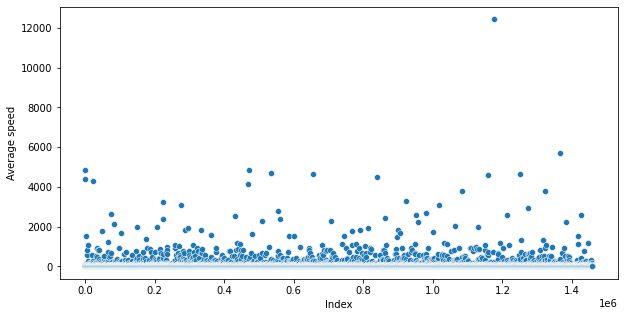

In [ ]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Предположим, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 

Найдем поездки, длительность которых превышает 24 часа и удалим их из набора данных.
Найдитем поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалим их из данных. 

In [ ]:
print("Всего поездок длиннее 24 часов: {}".format(taxi_data[taxi_data['trip_duration'] > 24 * 3600].shape[0]))
print("Всего поездок со средней скоростью более 300 км/ч: {}".format(taxi_data[taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6 > 300].shape[0]))

mask1 = taxi_data['trip_duration'] < 24 * 3600
mask2 = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6 < 300
taxi_data = taxi_data[mask1&mask2]

Всего поездок длиннее 24 часов: 4
Всего поездок со средней скоростью более 300 км/ч: 407


## 3. Разведывательный анализ данных (EDA)

Начинаем с целевого признака. Основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве цеизналевого прка:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.

In [ ]:
taxi_data['trip_duration_log'] = taxi_data['trip_duration'].apply(lambda x: np.log(x+1))

Построим гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделаем, является ли полученное распределение нормальным? 
Проверим свою гипотезу с помощью теста normaltest из библиотеки scipy при уровне значимости $\alpha=0.05$. 

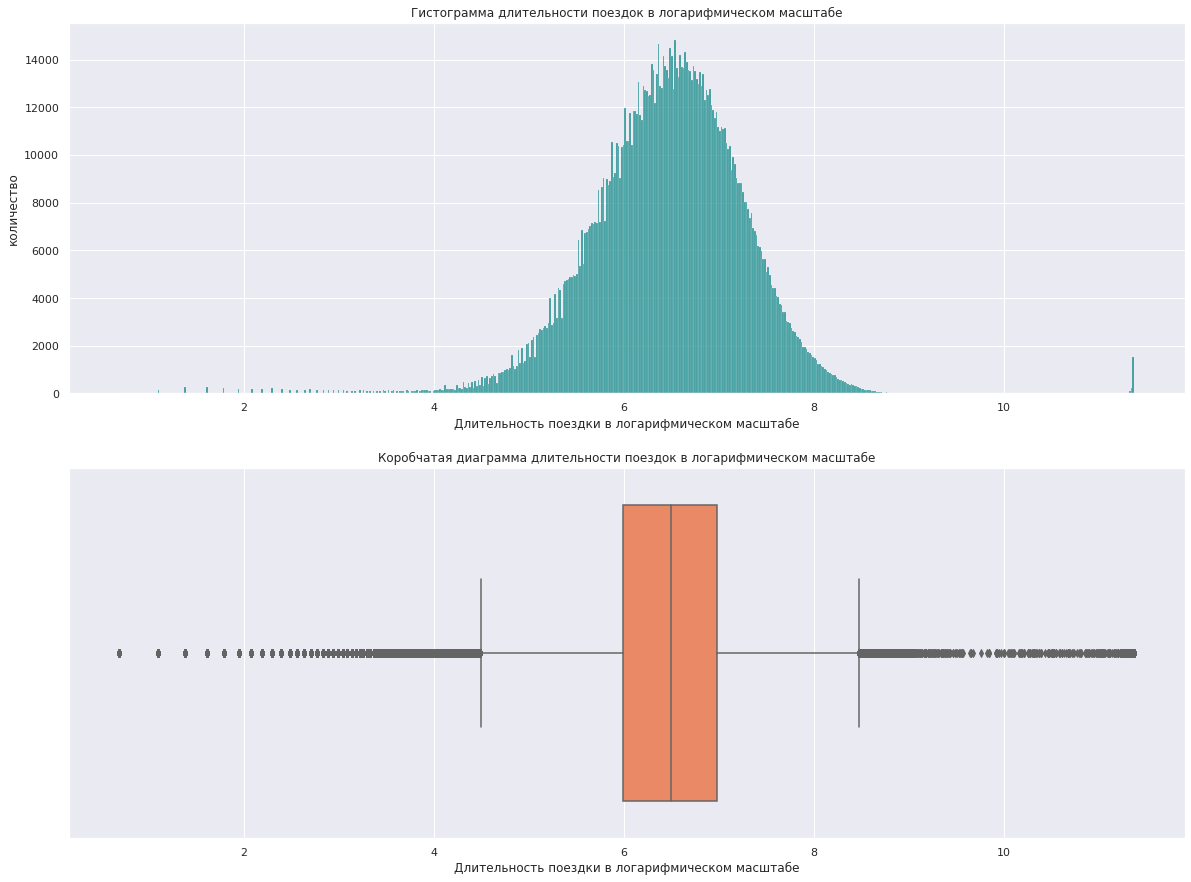

In [ ]:
sns.set(style='darkgrid')
fig,axes = plt.subplots(2,1,figsize=(20,15))
sns.histplot(data=taxi_data,x='trip_duration_log',ax=axes[0],color='teal');
axes[0].set_xlabel('Длительность поездки в логарифмическом масштабе')
axes[0].set_ylabel('количество')
axes[0].set_title('Гистограмма длительности поездок в логарифмическом масштабе')
sns.boxplot(data=taxi_data,x='trip_duration_log',ax=axes[1],color='coral')
axes[1].set_xlabel('Длительность поездки в логарифмическом масштабе')
axes[1].set_title('Коробчатая диаграмма длительности поездок в логарифмическом масштабе');

In [ ]:
alpha=0.05
k2,p_value = stats.normaltest(taxi_data['trip_duration_log'])
if p_value < alpha:
  print("Уровень значимости: {} , отвергаем нулевую гипотезу, данные распределены не нормально".format(p_value))
else: print("Уровень значимости: {} , принимаем нулевую гипотезу, данные распределены нормально".format(p_value))

Уровень значимости: 0.0 , отвергаем нулевую гипотезу, данные распределены не нормально


Построим визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

In [ ]:
fig = px.box(data_frame=taxi_data,
       color='vendor_id',
       x='trip_duration_log',
       title='Распределение длительности поездки в логарифмическом масштабе в зависимости от таксопарка',
       labels={'trip_duration_log': 'длительность поездки в логарифмическом масштабе','vendor_id': 'таксопарк'},
       height=800
       )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Построим визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 


In [ ]:
fig = px.box(data_frame=taxi_data,
       color='store_and_fwd_flag',
       x='trip_duration_log',
       title='Распределение длительности поездки в логарифмическом масштабе в зависимости от отправки сообщения поставщику',
       labels={'trip_duration_log': 'длительность поездки в логарифмическом масштабе','store_and_fwd_flag': 'отправка сообщения поставщику'},
       height=800,
        )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Построим две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

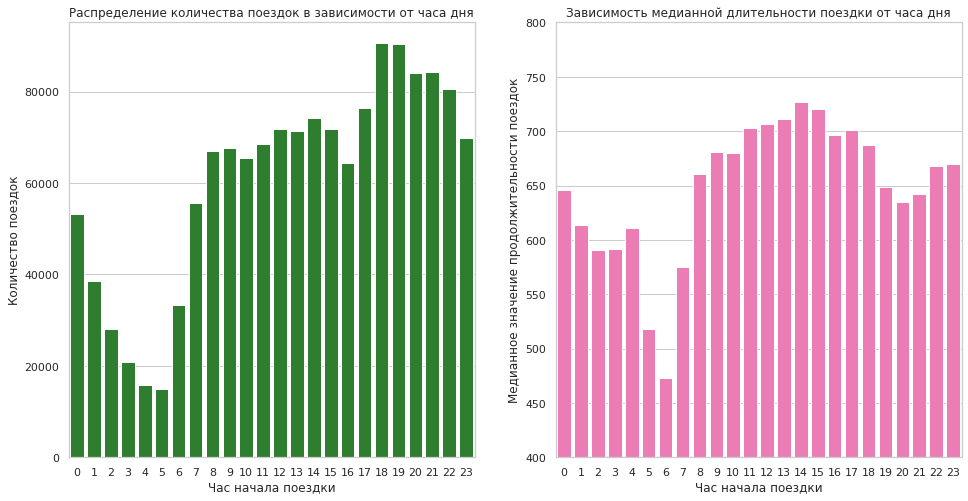

In [ ]:
group = taxi_data.groupby(['pickup_hour'],as_index=False)['trip_duration'].median()

sns.set(style='whitegrid')
fig,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=taxi_data,x='pickup_hour',ax=axes[0],color='forestgreen')
sns.barplot(data=group,x='pickup_hour',y='trip_duration', ax=axes[1],color='hotpink')
axes[0].set_title('Распределение количества поездок в зависимости от часа дня')
axes[0].set_xlabel('Час начала поездки')
axes[0].set_ylabel('Количество поездок')
axes[1].set_ylim(400,800)
axes[1].set_title('Зависимость медианной длительности поездки от часа дня')
axes[1].set_xlabel('Час начала поездки')
axes[1].set_ylabel('Медианное значение продолжительности поездок');


Как мы видим короче всего поездки с 2 часов ночи до 7 утра, также меньше всего поездок совершено в промежутке с часа ночит дло 6 утра

Построем две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

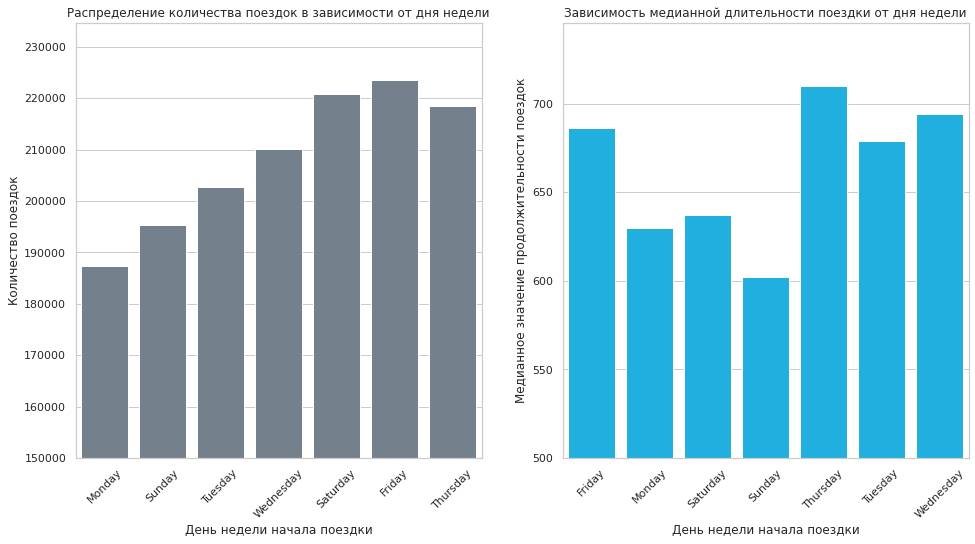

In [ ]:
group = taxi_data.groupby(['pickup_day_of_week'],as_index=False)['trip_duration'].median()

sns.set(style='whitegrid')
fig,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=taxi_data,x='pickup_day_of_week',ax=axes[0],color='slategrey')
sns.barplot(data=group,x='pickup_day_of_week',y='trip_duration', ax=axes[1],color='deepskyblue')
axes[0].set_title('Распределение количества поездок в зависимости от дня недели')
axes[0].set_xlabel('День недели начала поездки')
axes[0].set_ylabel('Количество поездок')
axes[0].set_ylim(bottom=150_000)
axes[0].tick_params(axis='x', rotation=45)
axes[1].set_ylim(bottom=500)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Зависимость медианной длительности поездки от дня недели')
axes[1].set_xlabel('День недели начала поездки')
axes[1].set_ylabel('Медианное значение продолжительности поездок');

- меньше всего поездок осуществляется в понедельник и воскресенье
- медианная длительность поездки в вокресенье меньше всех остальных дней

Посмотрим на обе временные характеристики одновременно. 

Построим сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируем полученную сводную таблицу с помощью тепловой карты 

In [ ]:
table = pd.pivot_table(data=taxi_data,index='pickup_hour',columns='pickup_day_of_week',values='trip_duration',aggfunc='median')
fig = px.imshow(img=table,
          width=1100,
          height=600,
          text_auto=True,
          labels={'y':'Час начала поездки','x':'День недели начала поездки','color':'Медианное значение продолжительности поездок'},
          title='Медианное значение длительности поездки в зависимости от дня недели и часа')
fig.show()


Построим две диаграммы рассеяния (scatter-диаграммы):
* первая будет иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая будет географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложим широту (longitude), а по оси ординат - долготу (latitude). 
Включим в визуализацию только те точки, которые находятся в пределах Нью-Йорка.

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавим на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

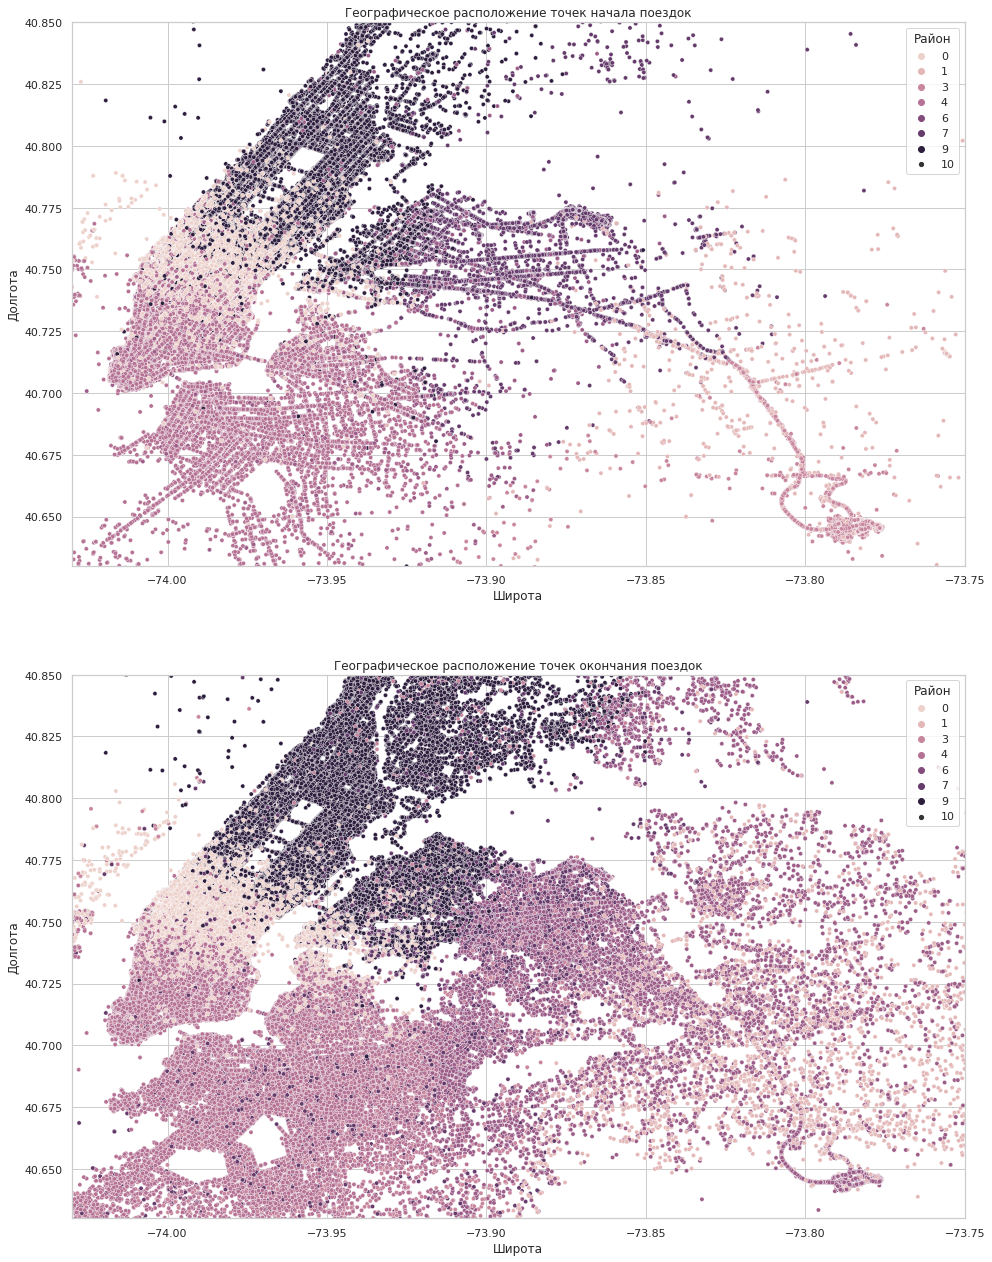

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig,axes = plt.subplots(2,1,figsize=(16,22))
sns.scatterplot(data=taxi_data,
                x='pickup_longitude', 
                y='pickup_latitude',
                hue='geo_cluster',
                legend='auto',
                size=10,
                ax=axes[0]);
sns.scatterplot(data=taxi_data,
                x='dropoff_longitude',
                y='dropoff_latitude',
                hue='geo_cluster',
                legend='auto',
                size=10,
                ax=axes[1]);
axes[0].set_xlim(*city_long_border)
axes[0].set_ylim(*city_lat_border)
axes[0].legend(title='Район',loc='best')
axes[0].set_title('Географическое расположение точек начала поездок')
axes[0].set_xlabel('Широта')
axes[0].set_ylabel('Долгота')

axes[1].set_xlim(*city_long_border)
axes[1].set_ylim(*city_lat_border);
axes[1].legend(title='Район',loc='best')
axes[1].set_title('Географическое расположение точек окончания поездок')
axes[1].set_xlabel('Широта')
axes[1].set_ylabel('Долгота');


## 4. Отбор и преобразование признаков

In [ ]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [ ]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [ ]:
drop_columns = ['pickup_datetime', 'pickup_date','id','dropoff_datetime']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)



Закодируем признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируем признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 1 в противном случае.

In [ ]:
train_data['vendor_id'] = np.where(train_data['vendor_id'] == 1,0,1)
train_data['store_and_fwd_flag'] = np.where(train_data['store_and_fwd_flag'] == 'Y',1,0)

Создадим таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn.

In [ ]:
one_hot_encoder = preprocessing.OneHotEncoder(drop='first')
one_hot_encoder.fit(train_data[['pickup_day_of_week', 'geo_cluster', 'events']])
data_onehot = one_hot_encoder.transform(train_data[['pickup_day_of_week', 'geo_cluster', 'events']]).toarray()
column_names = one_hot_encoder.get_feature_names_out()
data_onehot = pd.DataFrame(data_onehot, columns=column_names)

Добавим полученную таблицу с закодированными признаками:

In [ ]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [ ]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [ ]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


С помощью SelectKBest отберем 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуем по обучающей выборке, используя параметр score_func = f_regression.

In [ ]:
KBest = feature_selection.SelectKBest(score_func=feature_selection.f_regression,k=25)
KBest.fit(X,y_log)
X_train = KBest.transform(X_train)
X_valid = KBest.transform(X_valid)


Нормализуем предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. 

In [ ]:
mm = preprocessing.MinMaxScaler()
mm.fit(X_train)
X_train_scaled = mm.transform(X_train)
X_valid_scaled = mm.transform(X_valid)

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



Построим модель линейной регрессии на обучающей выборке

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X_train_scaled,y_train_log)
lr_prediction_train = lr.predict(X_train_scaled)
lr_prediction_valid = lr.predict(X_valid_scaled)
print('RMSLE X_train: {}, X_valid: {}'.format(metrics.mean_squared_error(y_train_log,lr_prediction_train)**0.5,
                                              metrics.mean_squared_error(y_valid_log,lr_prediction_valid)**0.5)
)

RMSLE X_train: 0.5356435185027016, X_valid: 0.5380984271876291



Построим модель дерева решений (DecisionTreeRegressor) на обучающей выборке.

In [ ]:
tr = tree.DecisionTreeRegressor(random_state=42)
tr.fit(X_train_scaled,y_train_log)
tr_prediction_train = tr.predict(X_train_scaled)
tr_prediction_valid = tr.predict(X_valid_scaled)

print('RMSLE X_train: {}, X_valid: {}'.format(metrics.mean_squared_error(y_train_log,tr_prediction_train)**0.5,
                                              metrics.mean_squared_error(y_valid_log,tr_prediction_valid)**0.5))

RMSLE X_train: 0.003049191583639303, X_valid: 0.5662791559916917



Переберем все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Построим линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

In [ ]:
 train_lst = []
valid_lst = []
for depth in range(7,21):
    tr = tree.DecisionTreeRegressor(random_state=42,max_depth=depth)
    train_prediction = tr.fit(X_train,y_train_log).predict(X_train)
    valid_prediction = tr.predict(X_valid)
    train_lst.append(metrics.mean_squared_error(y_train_log,train_prediction)**0.5)
    valid_lst.append(metrics.mean_squared_error(y_valid_log,valid_prediction)**0.5)

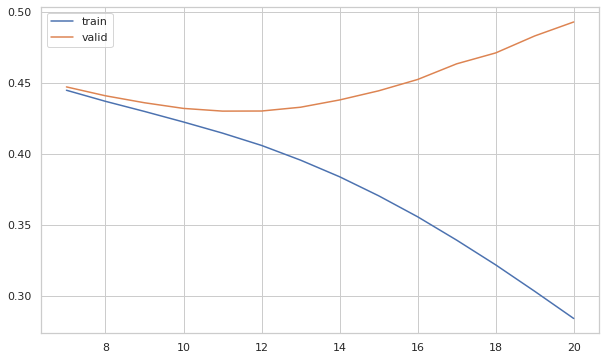

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(y=train_lst,x=range(7,21))
sns.lineplot(y=valid_lst,x=range(7,21));
plt.legend(['train','valid']);
plt.xlabel('Значение глубины Дерева решений')
plt.ylabel('Значение RMSLE')

Построим Дерево решений на оптимальной глубине и выведем значение целевой метрики

In [ ]:
tr = tree.DecisionTreeRegressor(random_state=42,max_depth=12)
tr.fit(X_train_scaled,y_train_log)
tr_prediction_train = tr.predict(X_train_scaled)
tr_prediction_valid = tr.predict(X_valid_scaled)

print('RMSLE X_train: {}, X_valid: {}'.format(metrics.mean_squared_error(y_train_log,tr_prediction_train)**0.5,
                                              metrics.mean_squared_error(y_valid_log,tr_prediction_valid)**0.5))

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Построим модель случайного леса на обучающей выборке. В качестве гиперпараметров возьмем следующие значения:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

In [ ]:
rf = ensemble.RandomForestRegressor(n_estimators=200,
                                    max_depth=12,
                                    criterion='squared_error',
                                    min_samples_split=20,
                                    random_state=42,
                                    n_jobs=-1,verbose=True)
rf.fit(X_train_scaled,y_train_log)
rf_prediction_train = rf.predict(X_train_scaled)
rf_prediction_valid = rf.predict(X_valid_scaled)

In [ ]:
print('RMSLE X_train: {}, X_valid: {}'.format(metrics.mean_squared_error(y_train_log,rf_prediction_train)**0.5,
                                              metrics.mean_squared_error(y_valid_log,rf_prediction_valid)**0.5))

Построим модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке   качестве гиперпараметров возьмем следующие значения:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

In [ ]:
gb = ensemble.GradientBoostingRegressor(learning_rate=0.5,
                                        n_estimators=100,
                                        max_depth=6,
                                        min_samples_split=30,
                                        random_state=42,
                                        verbose=True
                                        )
gb.fit(X_train_scaled,y_train_log)
gb_prediction_train = gb.predict(X_train_scaled)
gb_prediction_valid = gb.predict(X_valid_scaled)

      Iter       Train Loss   Remaining Time 
         1           0.3110           13.65m
         2           0.2247           13.54m
         3           0.1987           13.39m
         4           0.1875           13.23m
         5           0.1821           13.12m
         6           0.1789           12.94m
         7           0.1742           12.80m
         8           0.1721           12.64m
         9           0.1705           12.48m
        10           0.1694           12.35m
        20           0.1585           10.94m
        30           0.1532            9.55m
        40           0.1500            8.21m
        50           0.1468            6.86m
        60           0.1439            5.49m
        70           0.1421            4.16m
        80           0.1402            2.79m
        90           0.1383            1.40m
       100           0.1371            0.00s


In [ ]:
print('RMSLE X_train: {}, X_valid: {}'.format(metrics.mean_squared_error(y_train_log,gb_prediction_train)**0.5,
                                               metrics.mean_squared_error(y_valid_log,gb_prediction_valid)**0.5))

RMSLE X_train: 0.370280141889469, X_valid: 0.3925414670444254


Построим столбчатую диаграмму коэффициентов значимости каждого из факторов.

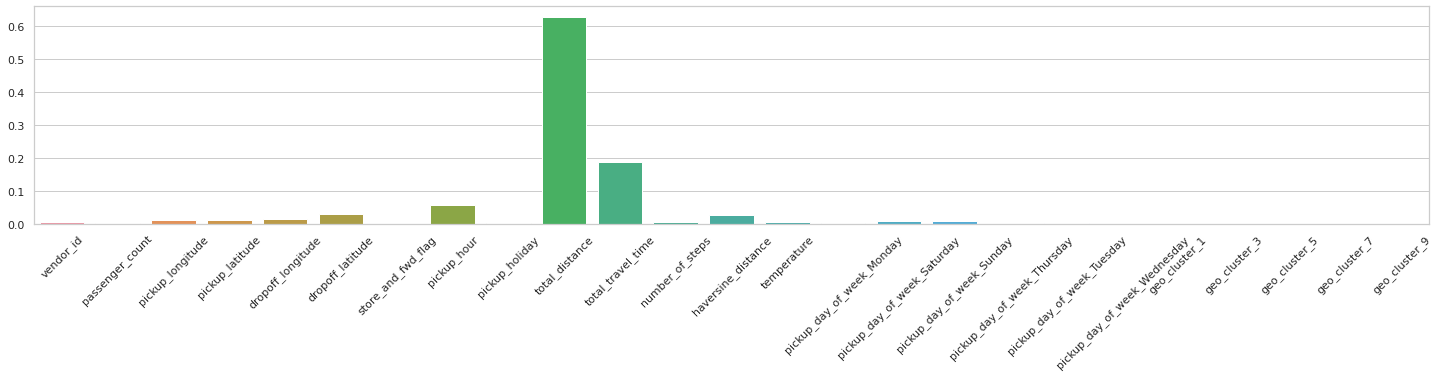

In [ ]:
fig = plt.figure(figsize=(25,4))
sns.barplot(y=gb.feature_importances_,x=KBest.get_feature_names_out())
plt.xticks(rotation=45);

In [74]:
import xgboost as xgb
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log)
dtest = xgb.DMatrix(X_test_scaled,)

In [75]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42228	valid-rmse:5.42188
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 20 rounds.
[10]	train-rmse:1.93571	valid-rmse:1.93571
[20]	train-rmse:0.785169	valid-rmse:0.78612
[30]	train-rmse:0.478708	valid-rmse:0.480867
[40]	train-rmse:0.42087	valid-rmse:0.423729
[50]	train-rmse:0.408845	valid-rmse:0.412142
[60]	train-rmse:0.403964	valid-rmse:0.407618
[70]	train-rmse:0.400452	valid-rmse:0.404552
[80]	train-rmse:0.398242	valid-rmse:0.402651
[90]	train-rmse:0.396625	valid-rmse:0.401337
[100]	train-rmse:0.395036	valid-rmse:0.399971
[110]	train-rmse:0.393557	valid-rmse:0.398805
[120]	train-rmse:0.392374	valid-rmse:0.39788
[130]	train-rmse:0.391475	valid-rmse:0.397193
[140]	train-rmse:0.390566	valid-rmse:0.396744
[150]	train-rmse:0.389382	valid-rmse:0.395849
[160]	train-rmse:0.388593	valid-rmse:0.395328
[170]	train-rmse:0.387712	valid-rmse:0.394759
[180]	train-rmse:0.386849	valid-rmse:0.39419


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("test.zip")
osrm_data_test = pd.read_csv("Project5_osrm_data_test.zip")
osrm_data_test  = osrm_data_test[['id','total_distance','total_travel_time','number_of_steps']]
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data) 

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
drop_columns = ['pickup_datetime', 'pickup_date','id']
test_data.drop(drop_columns,axis=1,inplace=True)
test_data.insert(31,'geo_cluster_8',0,False)
X_test = KBest.transform(test_data)
X_test_scaled = mm.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('submission.csv', index=False)